













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
import sklearn as sk

In [3]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [4]:
df = pd.read_csv("traintitanic.csv")

In [5]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The categorical data are:<br/>
Survived {0,1}<br/>
Pclass {1,2,3}<br/>
Sex {male, female}<br/>
Embarked {C,Q,S}<br/>


The numerical data are Age, SibSp, Parch and Fare.<br/><br/>
Age, Cabin and Embarked have missing data.

In [8]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class)
df.select_dtypes(include=['number']).groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


The people in first class had a highest mean age and the highest survival rate of almost 63 percent survival rate.<br/>
Meanwhile, the people in third class had the lowest mean age and lowest survival rate of around 24 percent.

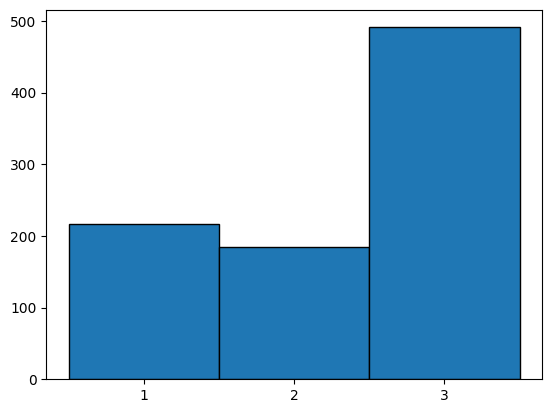

In [9]:
# Plot the histogram of Passenger's classes
bins = np.arange(min(df['Pclass']) - 0.5, max(df['Pclass']) + 1.5, 1)

plt.hist(df['Pclass'], bins=bins, edgecolor='black')
plt.xticks([1, 2, 3]);

In [10]:
#Comment about the impact of the sex of Passengers
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Almost 19 percent of the male and approximately 74 percent of the female survived.

In [11]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

It could be that people embarking from 'C' were placed in the part of the ship that was more likely to survive.

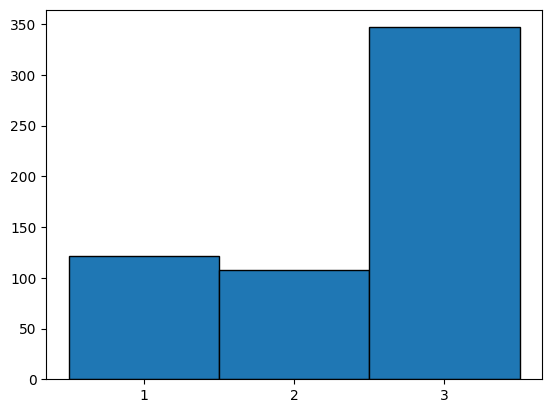

In [12]:
#Plot the histogram of the number of men in each class. Do the same for men. Comment.
data_male=df[df['Sex'] == 'male']['Pclass']
bins = np.arange(min(data_male) - 0.5, max(data_male) + 1.5, 1)
plt.hist(data_male, bins=bins, edgecolor='black');
plt.xticks([1, 2, 3]);

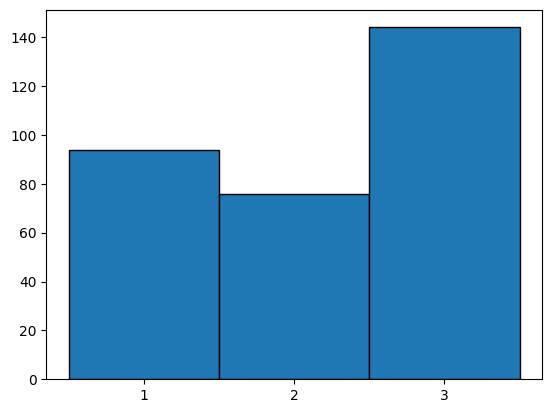

In [13]:
data_female=df[df['Sex'] == 'female']['Pclass']
bins = np.arange(min(data_female) - 0.5, max(data_female) + 1.5, 1)
plt.hist(data_female, bins=bins, edgecolor='black');
plt.xticks([1, 2, 3]);

The number of males in first and second class are about one-third more than females and the men are more than double in 3rd class than females.

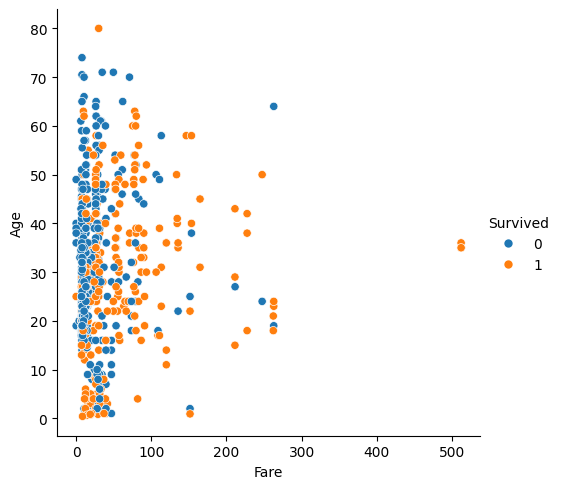

In [14]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

This plot gives a visual representation of survival based on age and fare. More the fare and age, higher the likeliness to survive.

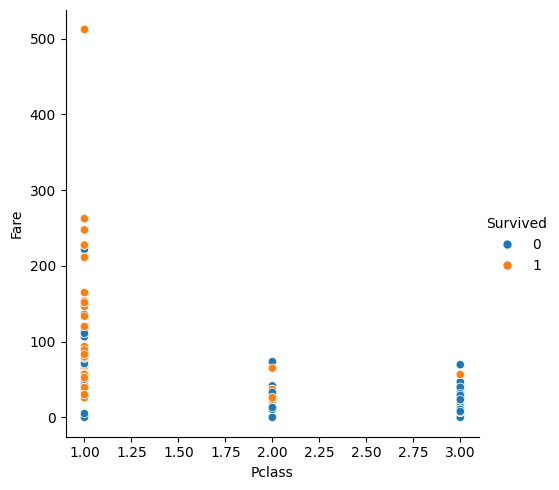

In [15]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.
sns.relplot(data=df, x='Pclass', y='Fare', hue='Survived')

This plot shows that even though we have people paying the same fares in different Pclass-es, it is the Pclass that has a bigger impact on the outcome of survival than the fare.

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [16]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [17]:
# What is the following code doing?
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


This creates columns with binary values based on categories in Embarked.

In [18]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'])
df = pd.concat([df, ports.astype("int")], axis=1)

In [19]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
df.drop(columns=["Sex","Embarked"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


In [20]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()
df.drop(columns=["Sex","Embarked"], inplace=True)

<Axes: >

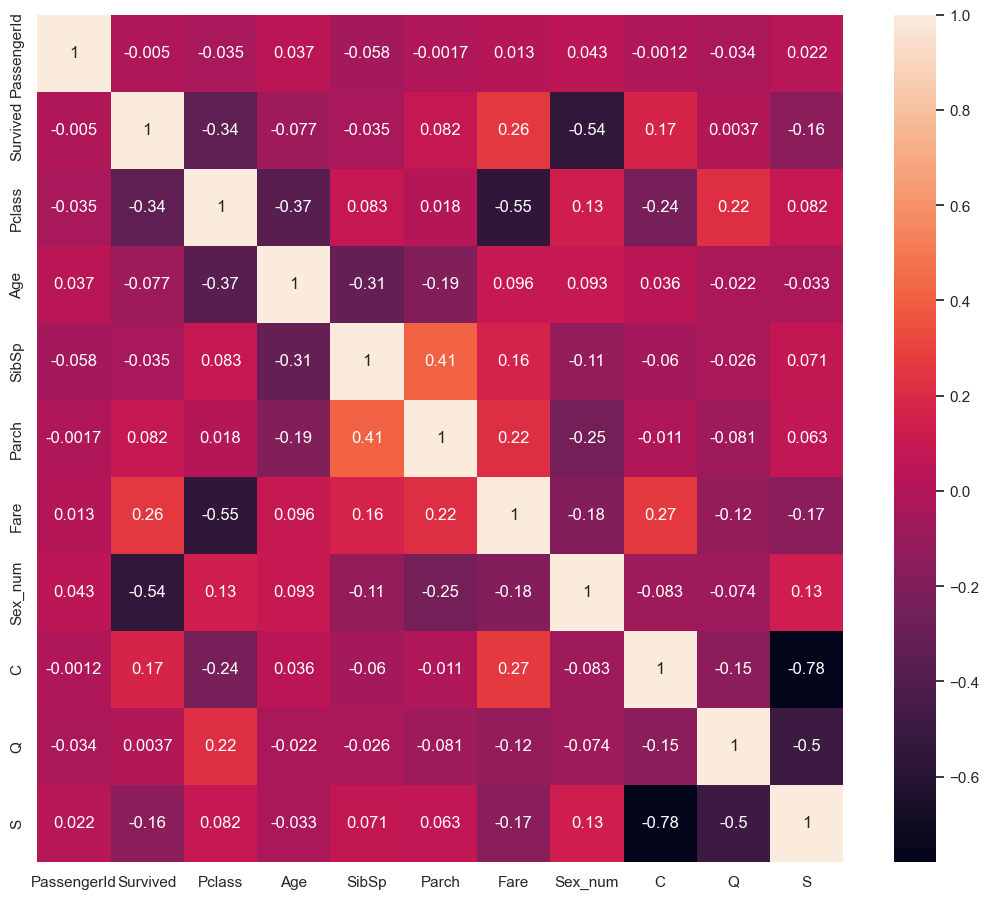

In [21]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap((df.select_dtypes(include=['number'])).corr(),annot=True)

The matrix gives the correlation coefficient of each pairs of df. It gives a symmetric matric with 1 in the diagonal (since correlation of (x,x) is 1). <br/>Value closer to 1 indicates strong postive relationship while closer to -1 indicates strong negative relationship.<br/> Value closer to 0 indicates little to no linear relationship.

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [22]:
# Do something smart to handle the problem of missing values in the "Age" column
m=df["Age"].mean()
sd=df["Age"].std()
df.loc[df['Age'].isna(), 'Age'] = np.random.normal(m, sd, df['Age'].isna().sum())

In [23]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?
mycolumns = ["Pclass","Age","SibSp","Parch","Fare","Sex_num","C","Q","S"]

Tickets is unique to each passenger and Cabin has too many missing data to be considered.

#Logistic regression


In [24]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

Penalty="l2" refers to L2 regularization (scalar multiple of the squared L2 norm of the coefficients) to avoid overfitting.<br/>
C is the regularization strength parameter where C=1 balances data fitting and regularization (higher C prioritizes fitting data and lower C prioritizes to avoid overfitting)<br/>
max_iter=1000 refers to a maximum of 1000 iterations of the gradient descent

In [25]:
# Fit the model
lr.fit(df[mycolumns],df["Survived"])

LogisticRegression(max_iter=1000)

In [26]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
coef_df = pd.DataFrame({
    'Feature': mycolumns,
    'Coefficient': lr.coef_[0]
})

print(coef_df)

   Feature  Coefficient
0   Pclass    -1.000390
1      Age    -0.030061
2    SibSp    -0.299484
3    Parch    -0.080620
4     Fare     0.002244
5  Sex_num    -2.627533
6        C     0.066600
7        Q     0.058999
8        S    -0.327139


We can see that Pclass and Sex has the highest magnitude of weights which makes sense based on previously seen plots. The values are negative for them because higher Pclass (among 1,2 and 3) and higher Sex_Num (with 1 representing Male) means less likely to survive.

In [27]:
lr.intercept_

array([4.60763699])

# Performance evaluation


In [28]:
# Load the test data
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [29]:
# Process the test features in order to obtain the same format as for the train set
Xtest["Sex_num"] = (Xtest["Sex"]=="male").astype("int")
Xtest = pd.concat([Xtest, (pd.get_dummies(Xtest['Embarked'])).astype("int")], axis=1)
Xtest.drop(columns=["Sex","Embarked"], inplace=True)

In [30]:
Xtest.loc[Xtest['Age'].isna(), 'Age'] = np.random.normal(Xtest["Age"].mean(), Xtest["Age"].std(), Xtest['Age'].isna().sum())

In [31]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest = pd.concat([Xtest[mycolumns], ytest], axis=1)
dftest.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,C,Q,S,PassengerId,Survived
0,3,34.5,0,0,7.8292,1,0,1,0,892,0
1,3,47.0,1,0,7.0000,0,0,0,1,893,1
2,2,62.0,0,0,9.6875,1,0,1,0,894,0
3,3,27.0,0,0,8.6625,1,0,0,1,895,0
4,3,22.0,1,1,12.2875,0,0,0,1,896,1


In [32]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
Xtest.describe()
dftest.dropna(subset=['Fare'], inplace=True)

In [33]:
dftest.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,C,Q,S,PassengerId,Survived
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,29.516621,0.448441,0.393285,35.627188,0.635492,0.244604,0.110312,0.645084,1100.635492,0.364508
std,0.842077,13.908629,0.897568,0.982419,55.907576,0.481870,0.430369,0.313654,0.479063,120.923774,0.481870
min,1.000000,-10.766653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,892.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,996.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,1101.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.500000,1.000000,0.000000,0.000000,1.000000,1205.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1309.000000,1.000000


In [34]:
# Compute the hard predictions on the test set (using only the columns to keep)
pred=lr.predict(dftest[mycolumns])

In [35]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(dftest["Survived"],pred)

0.9448441247002398

In [36]:
# Compute the soft predictions unsing predict_proba
lr.predict_proba(dftest[mycolumns])

array([[0.87885249, 0.12114751],
       [0.60284208, 0.39715792],
       [0.85860214, 0.14139786],
       [0.89476997, 0.10523003],
       [0.43402454, 0.56597546],
       [0.85174606, 0.14825394],
       [0.3141581 , 0.6858419 ],
       [0.80914107, 0.19085893],
       [0.24082028, 0.75917972],
       [0.92582585, 0.07417415],
       [0.9142957 , 0.0857043 ],
       [0.6619278 , 0.3380722 ],
       [0.07771513, 0.92228487],
       [0.92292792, 0.07707208],
       [0.15381154, 0.84618846],
       [0.15255448, 0.84744552],
       [0.7283179 , 0.2716821 ],
       [0.82771773, 0.17228227],
       [0.45363962, 0.54636038],
       [0.41665284, 0.58334716],
       [0.68422377, 0.31577623],
       [0.84452118, 0.15547882],
       [0.10915658, 0.89084342],
       [0.384112  , 0.615888  ],
       [0.09293835, 0.90706165],
       [0.95763764, 0.04236236],
       [0.04432161, 0.95567839],
       [0.83405315, 0.16594685],
       [0.62515682, 0.37484318],
       [0.93180083, 0.06819917],
       [0.

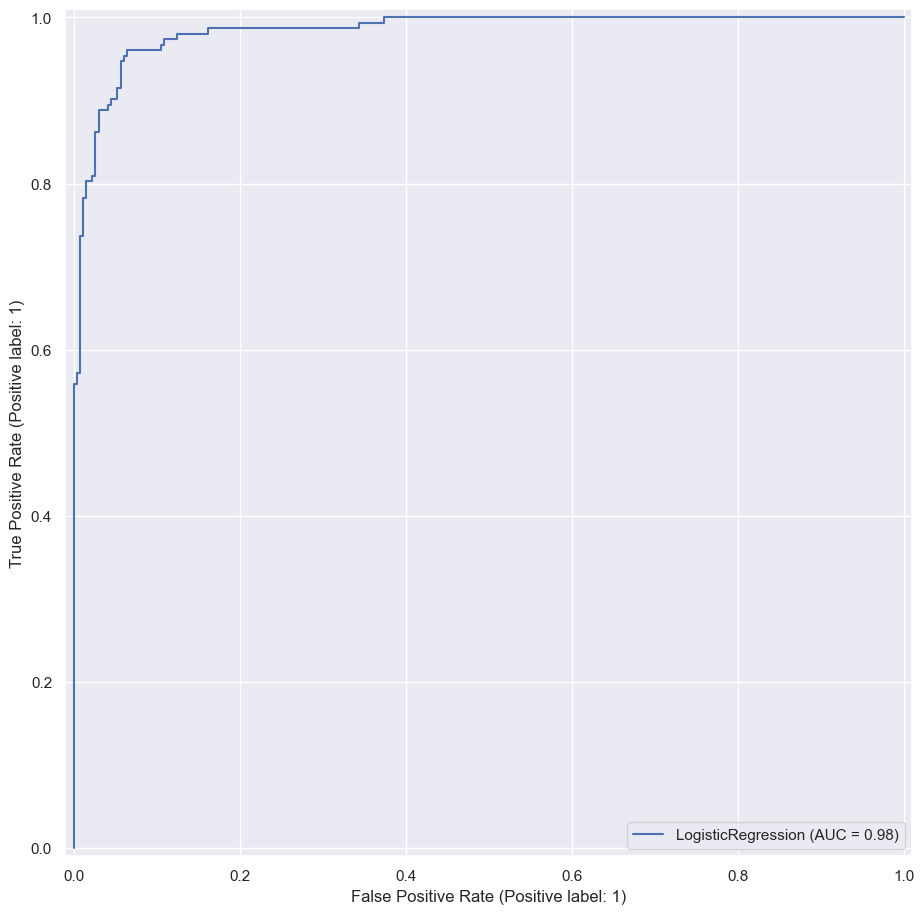

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, dftest[mycolumns], dftest["Survived"])

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression





## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(df[mycolumns],df["Survived"])
ls.intercept_,ls.coef_

(1.3682891501670171,
 array([-1.61984082e-01, -4.61893907e-03, -3.99022941e-02, -1.49878592e-02,
         3.08023569e-04, -5.08801451e-01, -7.97419654e-02, -8.30870978e-02,
        -1.44114568e-01]))

In [39]:
lin_preds=ls.predict(dftest[mycolumns])
lin_preds = [1 if p >= 0.5 else 0 for p in lin_preds]

In [40]:
accuracy_score(dftest["Survived"],lin_preds)

0.9664268585131894

Linear Regression surprisingly gave a better prediction but this could be because of the small dataset we have.

## L1 Regularization

In [41]:
lr1 = LogisticRegression(penalty='l1',C=1.0,max_iter=1000, solver='liblinear')
lr1.fit(df[mycolumns],df["Survived"])
lr1_preds=lr1.predict(dftest[mycolumns])

In [42]:
accuracy_score(dftest["Survived"],lr1_preds)

0.947242206235012

## Different regularization parameters

# Tweaking C value

In [43]:
val = np.linspace(0, 10, 50)[1:]
results = []

for i in val:
    lrx = LogisticRegression(penalty='l2', C=i, max_iter=1000)
    lrx.fit(df[mycolumns], df["Survived"])
    lrx_preds = lrx.predict(dftest[mycolumns])
    accuracy = accuracy_score(dftest["Survived"], lrx_preds)
    results.append([i, accuracy])

accuracy_df = pd.DataFrame(results, columns=["C", "Accuracy"])

<Axes: xlabel='C'>

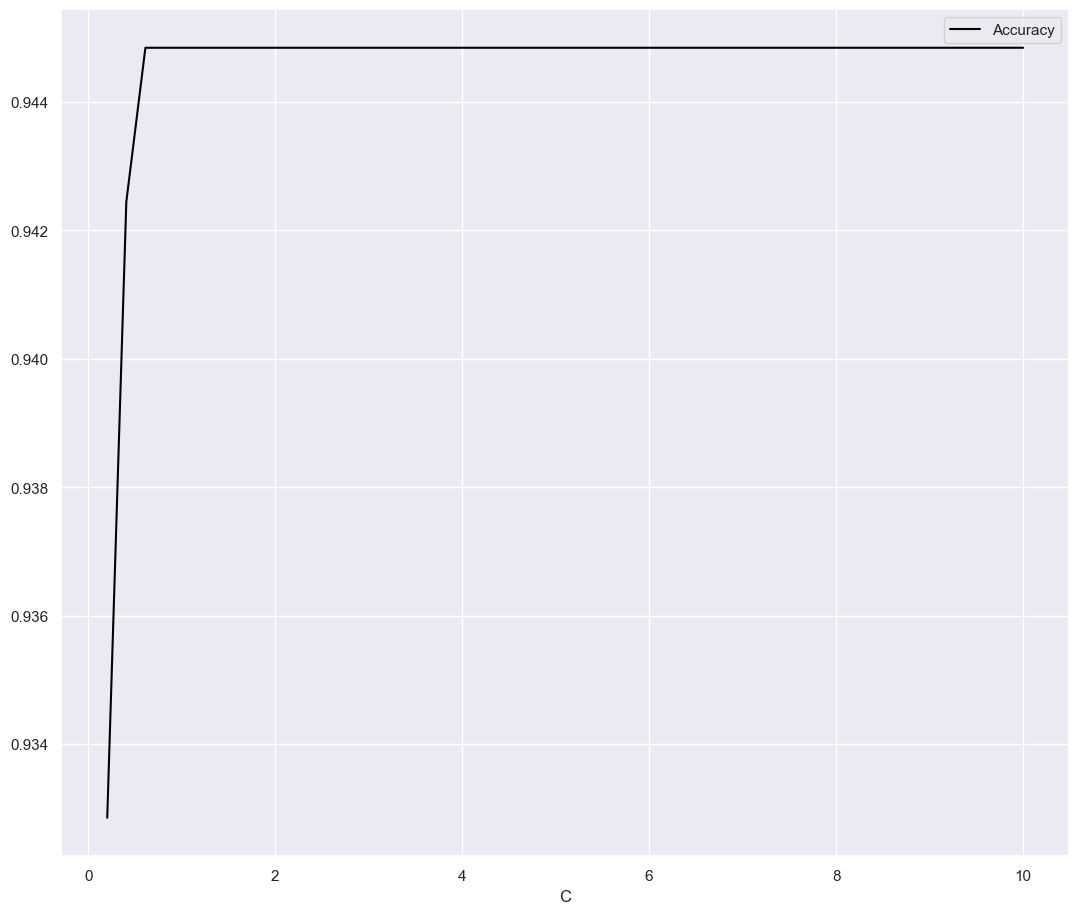

In [44]:
accuracy_df.plot(linestyle="-",x=0,y=1,color='black')

## Trying Different Values of Max Iterations

C:\Users\sthap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sthap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

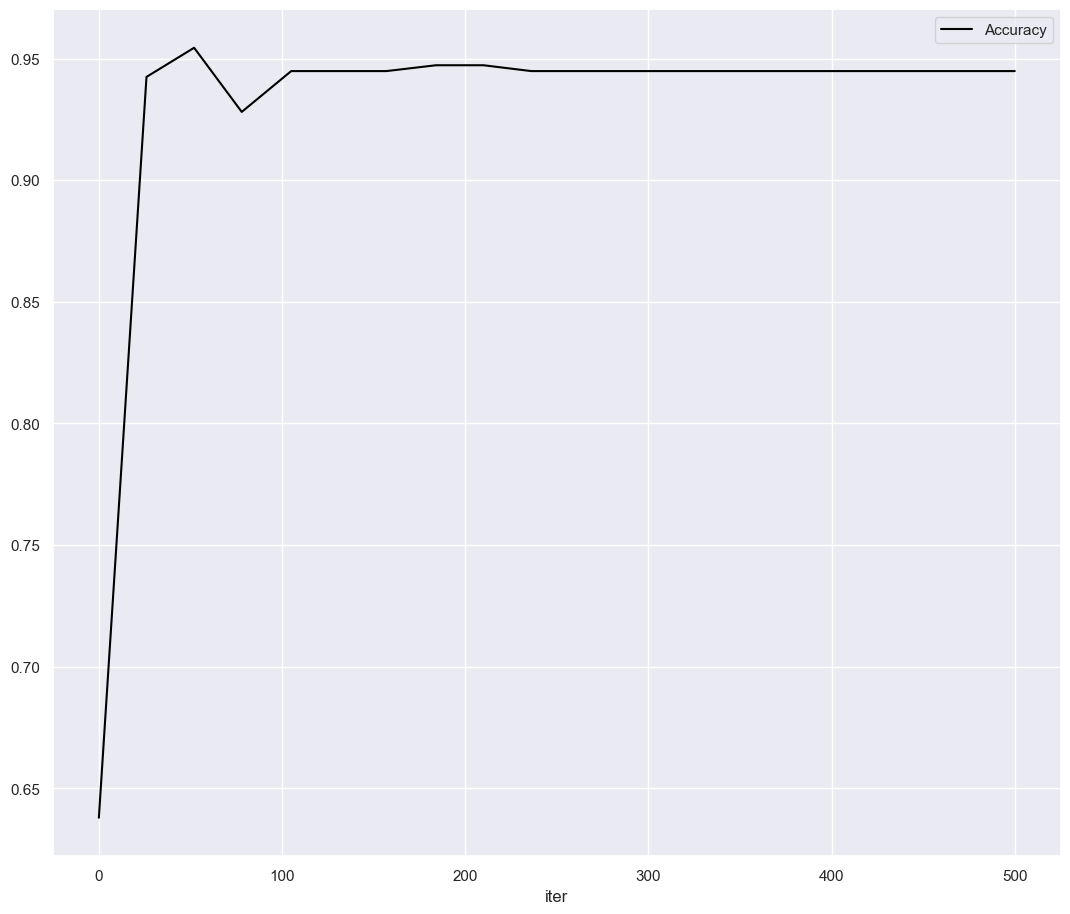

In [45]:
val = np.linspace(0,500, 20).astype(int)
results = []

for i in val:
    lrx = LogisticRegression(penalty='l2', C=1, max_iter=i)
    lrx.fit(df[mycolumns], df["Survived"])
    lrx_preds = lrx.predict(dftest[mycolumns])
    accuracy = accuracy_score(dftest["Survived"], lrx_preds)
    results.append([i, accuracy])

accuracy1_df = pd.DataFrame(results, columns=["iter", "Accuracy"])
accuracy1_df.plot(linestyle="-",x=0,y=1,color='black')


warnings.simplefilter("ignore", ConvergenceWarning)

It can be seen that the loss function converges to optimal solution after around 250 iterations and hence is a straight line afterwards.

## Including Cabin Number

In [46]:
df1 = df.dropna(subset=['Cabin'])
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,C,Q,S
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,455.401961,0.666667,1.196078,34.864298,0.441176,0.436275,76.141504,0.524510,0.338235,0.019608,0.632353
std,251.379279,0.472564,0.525961,15.697446,0.628918,0.729976,74.391749,0.500627,0.474273,0.138989,0.483351
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,261.750000,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125,0.000000,0.000000,0.000000,0.000000
50%,457.500000,1.000000,1.000000,35.000000,0.000000,0.000000,55.220850,1.000000,0.000000,0.000000,1.000000
75%,684.000000,1.000000,1.000000,47.000000,1.000000,1.000000,89.328150,1.000000,1.000000,0.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000


No missing data in this small set.

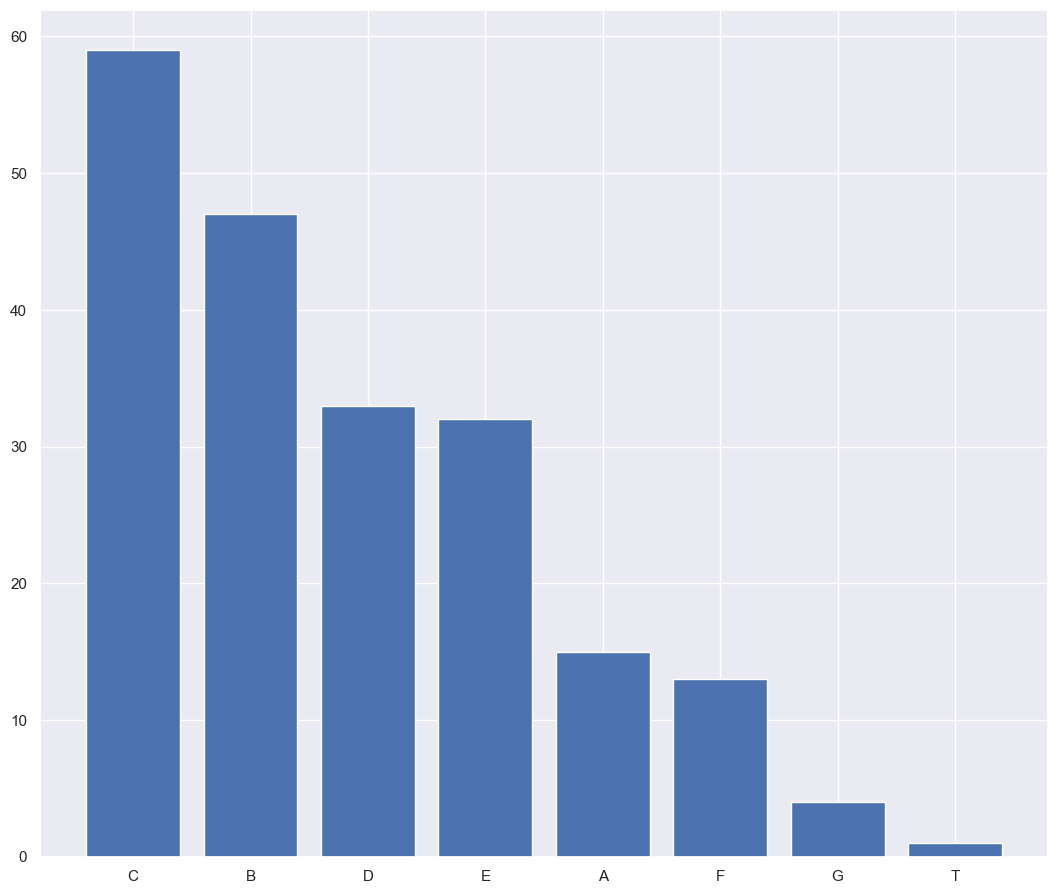

In [47]:
plt.bar(df1["Cabin"].astype(str).str[0].value_counts().index, 
        df1["Cabin"].astype(str).str[0].value_counts().values)

plt.show()

This shows that if we consider the first letter, this can be a categorical feature.

In [48]:
df1["Cabin"] = df1["Cabin"].astype(str).str[0]
ports_1 = pd.get_dummies(df1['Cabin'])
ports_1.columns = ["C_" + col for col in ports_1.columns]
df1 = pd.concat([df1, ports_1.astype("int")], axis=1)
df1.drop(columns=["Cabin"], inplace=True)

C:\Users\sthap\AppData\Local\Temp\ipykernel_16268\3475776310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Cabin"] = df1["Cabin"].astype(str).str[0]


In [49]:
newcolumns=mycolumns+list(ports_1.columns)

In [50]:
lrc = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)
lrc.fit(df1[newcolumns],df1["Survived"])

LogisticRegression(max_iter=1000)

In [51]:
dftest_1 = pd.concat([dftest, Xtest["Cabin"]], axis=1)
dftest_1 = dftest_1.dropna(subset=['Cabin'])

In [52]:
dftest_1["Cabin"] = dftest_1["Cabin"].astype(str).str[0]
ports_2 = pd.get_dummies(dftest_1['Cabin'])
ports_2.columns = ["C_" + col for col in ports_2.columns]
dftest_1 = pd.concat([dftest_1, ports_2.astype("int")], axis=1)
dftest_1.drop(columns=["Cabin"], inplace=True)

In [53]:
dftest_1['C_T'] = 0
lrc_pred=lrc.predict(dftest_1[newcolumns])

In [54]:
accuracy_score(dftest_1["Survived"],lrc_pred)

0.8241758241758241

The idea here was to do a logistic regression on train set which have Cabin data available and test on data with Cabin data.<br/> To make it categorical, we take the first element of the Cabin Number.<br/> Only 23 percent of the data have Cabin data in train set.It can be seen that with so little data to train, the accuracy was decent given that we know the first letter of Cabin of test set.<br/> If the Cabin Number had been a big factor that determined survival, this could have resulted in a better prediction model.